<a href="https://colab.research.google.com/github/AgnesMachau/Moringa-Projects/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2019_07_Agnes_Machau_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Moringa data science prep Independent Project**

In [1]:
#importing the libraries we will need
#importing pandas library as pd
import pandas as pd
#importing numpy library as np
import numpy as np
#importing the seaborn library
import seaborn as sns

In [2]:
#I renamed my dataset Autolib_dataset
#loading our dataset from csv into our notebook
df = pd.read_csv('http://bit.ly/autolib_dataset')
#Preveiwing the data
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [3]:
#Preveiwing the dataset
df.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


In [4]:
#viewing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [5]:
#viewing the shape of the dataset
df.shape

(5000, 25)

**Data Cleaning**

**Validity**

In [6]:
#dropping columns that are not important

df.drop(['Cars', 'Charge Slots', 'Charging Status', 'Displayed comment', 'Geo point', 'Public name', 'Rental status', 'Scheduled at', 'Station type', 'Subscription status'], axis = 1, inplace = True)
df

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Slots,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,1,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,2,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,2018,4,4,17,27


In [7]:
#Checking for any syntax errors
#dropping any syntax errors
df.columns = df.columns.str.strip()
df

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Slots,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,1,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,2,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,2018,4,4,17,27


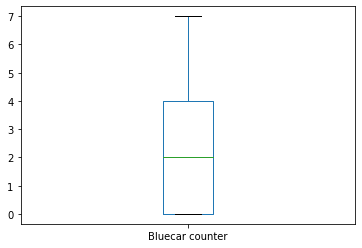

In [8]:
#checking for any outliers in the bluecar counter column
df.boxplot(column = ['Bluecar counter'], grid = False)

In [9]:
#dropping any outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_clean.shape)
print(df.shape)

(4210, 15)
(5000, 15)


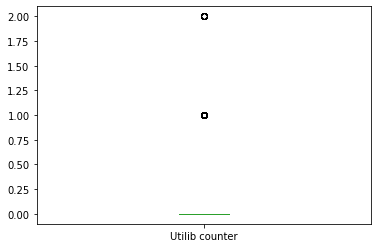

In [10]:
#checking for any outliers in the utilib counter column
df.boxplot(column = ['Utilib counter'], grid = False)

In [11]:
#dropping any outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_clean.shape)
print(df.shape)

(4210, 15)
(5000, 15)


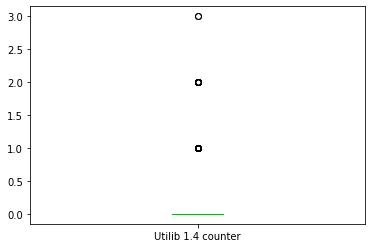

In [12]:
#checking for any outliers in the utilib1.4 column
df.boxplot(column = ['Utilib 1.4 counter'], grid = False)

In [13]:
#dropping any outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_clean.shape)
print(df.shape)

(4210, 15)
(5000, 15)


**Accuracy**

In [14]:
#procedure : None
#data cleaning action : None
#explanation : None

**Completeness**

In [15]:
#checking for any missing values
np.count_nonzero(df_clean.isnull())

0

**Consistency**

In [16]:
#checking for any duplicates
df_clean.duplicated()


0       False
1       False
4       False
5       False
6       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 4210, dtype: bool

**Uniformity**

In [17]:
#renaming columns to lowercase
df_clean.columns = df_clean.columns.str.lower()
df.columns

Index(['Address', 'Bluecar counter', 'Utilib counter', 'Utilib 1.4 counter',
       'City', 'ID', 'Kind', 'Postal code', 'Slots', 'Status', 'year', 'month',
       'day', 'hour', 'minute'],
      dtype='object')

In [18]:
#renaming columns
df_clean.columns = ['address', 'bluecar', 'utilib', 'utilib1.4', 'city', 'id', 'kind', 'postal_code', 'slots', 'status', 'year', 'month', 'day', 'hour', 'minute']
df_clean.columns

Index(['address', 'bluecar', 'utilib', 'utilib1.4', 'city', 'id', 'kind',
       'postal_code', 'slots', 'status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [19]:
#creating a date_time column to hold; year, month, day, hour, minute
df_clean['datetime'] = pd.to_datetime(df_clean[['year',	'month', 'day',	'hour',	'minute']])
df_clean.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,address,bluecar,utilib,utilib1.4,city,id,kind,postal_code,slots,status,year,month,day,hour,minute,datetime
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,2018,4,6,7,24,2018-04-06 07:24:00
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,2018,4,8,17,23,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,2018,4,6,7,2,2018-04-06 07:02:00
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,2018,4,8,18,20,2018-04-08 18:20:00


In [20]:
#dropping the year, month, day and minute column
df_clean.drop(["year", "month", "day", "minute"], axis = 1, inplace = True)
df_clean

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,address,bluecar,utilib,utilib1.4,city,id,kind,postal_code,slots,status,hour,datetime
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,7,2018-04-06 07:24:00
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,17,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,7,2018-04-06 07:02:00
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,18,2018-04-08 18:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,3,ok,11,2018-04-06 11:26:00
4996,37 rue de Dantzig,4,0,0,Paris,paris-dantzig-37,STATION,75015,2,ok,16,2018-04-04 16:56:00
4997,142 rue du Bac,1,0,0,Paris,paris-bac-142,STATION,75007,4,ok,7,2018-04-01 07:01:00
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,3,ok,17,2018-04-04 17:27:00


In [21]:
#creating a new column where we will find the difference in the number of bluecars at the station/counter
#this will help us know whether the car was picked up, returned or nothing happened
#positive means a car was returned
#negative means a car was taken

df_clean['bluecar_diff'] = df_clean['bluecar'].diff()
df_clean.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,address,bluecar,utilib,utilib1.4,city,id,kind,postal_code,slots,status,hour,datetime,bluecar_diff
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,11,2018-04-08 11:43:00,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,7,2018-04-06 07:24:00,6.0
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,17,2018-04-08 17:23:00,-3.0
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,7,2018-04-06 07:02:00,-3.0
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,18,2018-04-08 18:20:00,0.0


In [22]:
#creating a utilib difference column
df_clean['utilib_diff'] = df_clean['utilib'].diff()
df_clean.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,address,bluecar,utilib,utilib1.4,city,id,kind,postal_code,slots,status,hour,datetime,bluecar_diff,utilib_diff
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,11,2018-04-08 11:43:00,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,7,2018-04-06 07:24:00,6.0,0.0
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,17,2018-04-08 17:23:00,-3.0,0.0
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,7,2018-04-06 07:02:00,-3.0,0.0
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,18,2018-04-08 18:20:00,0.0,0.0


In [23]:
#creating a utilib1.4 difference column
df_clean['utilib1.4_diff'] = df_clean['utilib1.4'].diff()
df_clean.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,address,bluecar,utilib,utilib1.4,city,id,kind,postal_code,slots,status,hour,datetime,bluecar_diff,utilib_diff,utilib1.4_diff
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,11,2018-04-08 11:43:00,NaN,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,7,2018-04-06 07:24:00,6.0,0.0,0.0
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,17,2018-04-08 17:23:00,-3.0,0.0,0.0
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,7,2018-04-06 07:02:00,-3.0,0.0,0.0
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,18,2018-04-08 18:20:00,0.0,0.0,0.0


In [24]:
#exporting the cleaned dataset into a csv file
df_clean.to_csv('autolib_dataset.csv')

In [25]:
df_clean.shape

(4210, 15)

**Analysis**

In [26]:
#selecting rows with Paris under the city column 
df_paris = df_clean[df_clean['city'] == 'Paris']
df_paris.head()

,address,bluecar,utilib,utilib1.4,city,id,kind,postal_code,slots,status,hour,datetime,bluecar_diff,utilib_diff,utilib1.4_diff
0,2 Avenue de Suffren,0,0,0,Paris,paris-suffren-2,STATION,75015,2,ok,11,2018-04-08 11:43:00,NaN,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,0,ok,7,2018-04-06 07:24:00,6.0,0.0,0.0
4,6 avenue de la Porte de Champerret,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,3,ok,17,2018-04-08 17:23:00,-3.0,0.0,0.0
5,8 Boulevard Voltaire,0,0,0,Paris,paris-voltaire-8,STATION,75011,4,ok,7,2018-04-06 07:02:00,-3.0,0.0,0.0
6,37 rue Leblanc,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,0,closed,18,2018-04-08 18:20:00,0.0,0.0,0.0


In [27]:
#finding out the shape of the dataset that has Paris on it's city column
df_paris.shape

(2412, 15)

In [28]:
#finding out the most popular hour of the day for picking up a shared electric car(bluecar)in the city of Paris over the month of April 2018
df_paris[df_paris['bluecar_diff'] < 0].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)


hour
21    63
Name: hour, dtype: int64

In [29]:
#finding out the most popular hour for returning a bluecar

df_paris[df_paris['bluecar_diff'] > 0].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

hour
8    45
Name: hour, dtype: int64

Which station is the most popular?

In [30]:
#finding out the most popular station(overall)
df_paris[(df_paris['status']=='ok') & (df_paris['kind']=='STATION')].groupby('id')['id'].count().sort_values(ascending = False).head(1)


id
paris-voltaire-182    11
Name: id, dtype: int64

In [31]:
#finding out the most popular station at the most popular picking hour
df_paris[(df_paris['status']=='ok') & (df_paris['kind']=='STATION') & (df_paris['hour']==21)].groupby('id')['id'].count().sort_values(ascending = False).head(1)

id
paris-tronchet-19    4
Name: id, dtype: int64

Which postal code is the most popular for picking up Bluecars?

In [32]:
#finding out the most popular postal code for picking up bluecars
df_paris[(df_paris['bluecar_diff'] < 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

postal_code
75015    99
Name: postal_code, dtype: int64

In [33]:
#finding out if the most popular station belongs to the most popular postal code for picking up bluecars
df_paris[(df_paris['status']=='ok') & (df_paris['kind']=='STATION')].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

postal_code
75015    185
Name: postal_code, dtype: int64

We conclude that the most popular station has the most popular postal code for picking up bluecars which is 75015

In [34]:
#finding out if the most popular station at the most popular picking hour belongs to the most popular postal code for picking up blue cars
df_paris[(df_paris['status']=='ok') & (df_paris['kind']=='STATION') & (df_paris['hour']==21)].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

postal_code
75008    11
Name: postal_code, dtype: int64

We conclude that the most popular station at the most popular picking hour does not belong to the most popular postal code for picking up blue cars

In [35]:
#finding out what postal code is the most popular for picking up blue cars at the most popular picking hour
df_paris[(df_paris['bluecar_diff'] < 0) & (['hour'])].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

postal_code
75015    99
Name: postal_code, dtype: int64

**Considering utilib**

In [36]:
#finding out the most popular hour of the day for picking up a shared electric car(utilib)in the city of Paris over the month of April 2018
df_paris[df_paris['utilib_diff'] < 0].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

Series([], Name: hour, dtype: int64)

In [37]:
#finding out the most popular hour for returning a utilib car

df_paris[df_paris['utilib_diff'] > 0].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

Series([], Name: hour, dtype: int64)

Which postal code is the most popular for picking up utilib cars

In [38]:
#finding out the most popular postal code for picking up utilib cars
df_paris[(df_paris['utilib_diff'] < 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

Series([], Name: postal_code, dtype: int64)

In [39]:
#finding out what postal code is the most popular for picking up utilib cars at the most popular picking hour
df_paris[(df_paris['utilib_diff'] < 0) & (['hour'])].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

Series([], Name: postal_code, dtype: int64)

**Considering utilib 1.4 cars**

In [40]:
#finding out the most popular hour of the day for picking up a shared electric car(utilib1.4)in the city of Paris over the month of April 2018
df_paris[df_paris['utilib1.4_diff'] < 0].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

Series([], Name: hour, dtype: int64)

In [41]:
#finding out the most popular hour for returning a utilib1.4 car

df_paris[df_paris['utilib1.4_diff'] > 0].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

Series([], Name: hour, dtype: int64)

Which postal code is the most popular for picking up utilib1.4 cars

In [42]:
#finding out the most popular postal code for picking up utilib1.4 cars
df_paris[(df_paris['utilib1.4_diff'] < 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

Series([], Name: postal_code, dtype: int64)

In [43]:
#finding out what postal code is the most popular for picking up utilib1.4 cars at the most popular picking hour
df_paris[(df_paris['utilib1.4_diff'] < 0) & (['hour'])].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

Series([], Name: postal_code, dtype: int64)

In [44]:
#finding out the most popular address for picking up blue cars
df_paris[(df_paris['bluecar_diff'] < 0)].groupby('address')['address'].count().sort_values(ascending = False).head(1)

address
31 boulevard de Grenelle    9
Name: address, dtype: int64

In [45]:
#finding out if the most popular station belongs to the most popular address for picking up blue cars
df_paris[(df_paris['status']=='ok') & (df_paris['kind']=='STATION')].groupby('address')['address'].count().sort_values(ascending = False).head(1)


address
182 Boulevard Voltaire    11
Name: address, dtype: int64

We conclude that the most popular station does not belong to the most popular address for picking up blue cars